**bold text**
I'll create a Python script that performs both Detrended Correspondence Analysis (DCA) and Canonical Correspondence Analysis (CCA) using example ecological data, and visualize the results.


I've created a comprehensive script that:

1. Generates example ecological data:
   - Species abundance matrix with realistic gradient responses
   - Environmental variables matrix

2. Implements DCA (Detrended Correspondence Analysis):
   - Calculates chi-square distances
   - Performs ordination using SVD
   - Returns site and species scores

3. Implements CCA (Canonical Correspondence Analysis):
   - Incorporates environmental variables
   - Performs constrained ordination
   - Returns site scores, species scores, and eigenvalues

4. Creates visualization:
   - Side-by-side plots for DCA and CCA
   - Sites shown as blue dots
   - Species shown as red triangles
   - Environmental variables as green arrows (for CCA)
   - Proper scaling and labels

The plots will help you visualize:
- Species-site relationships in unconstrained space (DCA)
- Species-environment relationships in constrained space (CCA)
- The direction and strength of environmental gradients



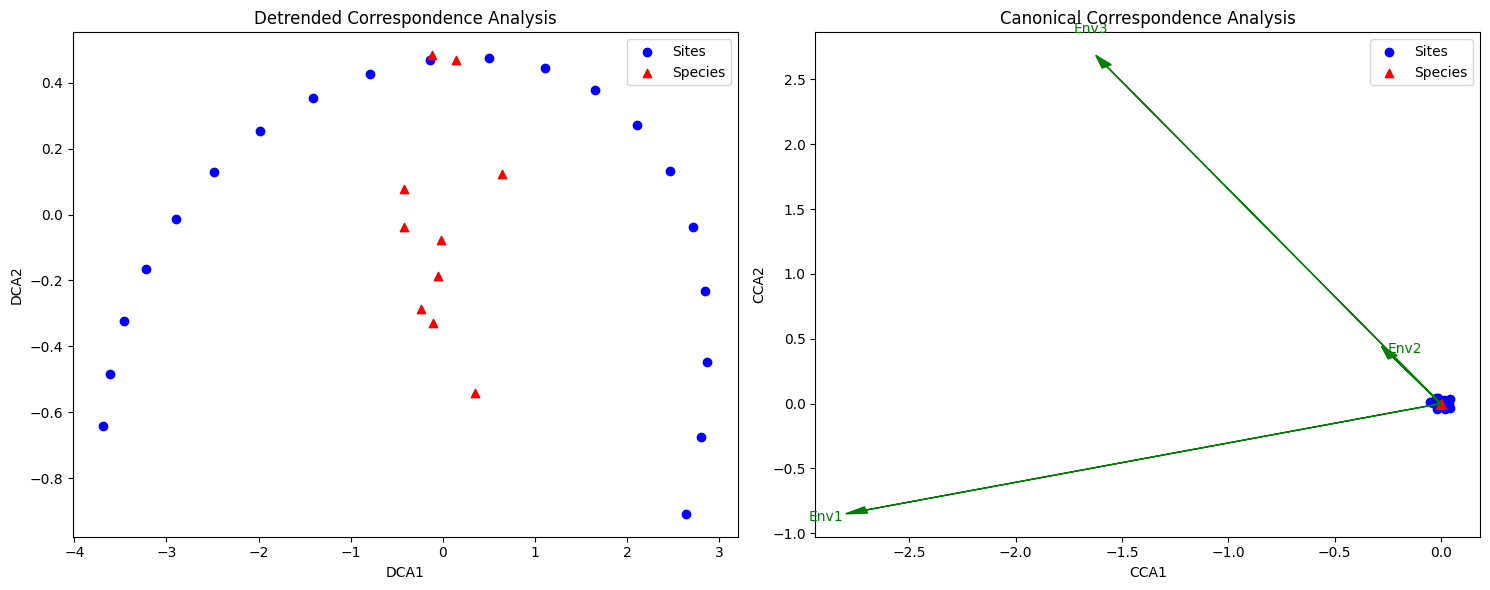


CCA Eigenvalues:
Axis 1: 0.0000
Axis 2: 0.0000


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy import stats

# Generate example species abundance data
np.random.seed(42)
n_sites = 20
n_species = 10
n_environmental = 3

# Create species abundance matrix with some ecological patterns
species_data = np.zeros((n_sites, n_species))
for i in range(n_species):
    # Create gradient responses for species
    optimum = np.random.uniform(0, n_sites)
    tolerance = np.random.uniform(5, 15)
    abundance = stats.norm.pdf(np.arange(n_sites), optimum, tolerance)
    species_data[:, i] = abundance * np.random.uniform(50, 200)

# Create environmental variables
env_data = np.random.normal(size=(n_sites, n_environmental))
env_data = StandardScaler().fit_transform(env_data)

def detrended_correspondence_analysis(species_matrix, n_components=2):
    """
    Implement a simplified DCA
    """
    # Calculate chi-square distances
    row_sums = species_matrix.sum(axis=1)
    col_sums = species_matrix.sum(axis=0)
    total_sum = species_matrix.sum()

    expected = np.outer(row_sums, col_sums) / total_sum
    chi_square = (species_matrix - expected) / np.sqrt(expected)

    # Perform SVD
    U, S, Vt = np.linalg.svd(chi_square, full_matrices=False)

    # Get site and species scores
    site_scores = U[:, :n_components] * S[:n_components]
    species_scores = Vt.T[:, :n_components]

    return site_scores, species_scores

def canonical_correspondence_analysis(species_matrix, env_matrix, n_components=2):
    """
    Implement a simplified CCA
    """
    # Prepare matrices
    Y = species_matrix
    X = env_matrix

    # Calculate chi-square distances
    row_sums = Y.sum(axis=1)
    col_sums = Y.sum(axis=0)
    total_sum = Y.sum()

    # Create weight matrices
    R = np.diag(1/row_sums)
    C = np.diag(1/col_sums)

    # Calculate weighted residual matrix
    O = Y / total_sum
    expected = np.outer(row_sums, col_sums) / total_sum**2
    W = (O - expected) / np.sqrt(expected)

    # Fit CCA
    Q = R @ X
    S = Q.T @ W @ C @ W.T @ Q

    # Eigendecomposition
    eigenvals, eigenvecs = np.linalg.eigh(S)
    idx = eigenvals.argsort()[::-1]
    eigenvals = eigenvals[idx]
    eigenvecs = eigenvecs[:, idx]

    # Calculate site and species scores
    site_scores = Q @ eigenvecs[:, :n_components]
    species_scores = C @ W.T @ Q @ eigenvecs[:, :n_components]

    return site_scores, species_scores, eigenvals[:n_components]

# Perform DCA
dca_sites, dca_species = detrended_correspondence_analysis(species_data)

# Perform CCA
cca_sites, cca_species, cca_eigenvals = canonical_correspondence_analysis(species_data, env_data)

# Plot results
plt.figure(figsize=(15, 6))

# DCA Plot
plt.subplot(121)
plt.scatter(dca_sites[:, 0], dca_sites[:, 1], c='blue', label='Sites')
plt.scatter(dca_species[:, 0], dca_species[:, 1], c='red', marker='^', label='Species')
plt.xlabel('DCA1')
plt.ylabel('DCA2')
plt.title('Detrended Correspondence Analysis')
plt.legend()

# CCA Plot
plt.subplot(122)
plt.scatter(cca_sites[:, 0], cca_sites[:, 1], c='blue', label='Sites')
plt.scatter(cca_species[:, 0], cca_species[:, 1], c='red', marker='^', label='Species')

# Plot environmental variables as arrows
scaling_factor = 3
for i in range(env_data.shape[1]):
    correlation = np.corrcoef(env_data[:, i], cca_sites[:, 0])[0, 1]
    correlation2 = np.corrcoef(env_data[:, i], cca_sites[:, 1])[0, 1]
    plt.arrow(0, 0, correlation * scaling_factor, correlation2 * scaling_factor,
              head_width=0.05, head_length=0.1, fc='green', ec='green')
    plt.text(correlation * scaling_factor * 1.1, correlation2 * scaling_factor * 1.1,
            f'Env{i+1}', color='green')

plt.xlabel('CCA1')
plt.ylabel('CCA2')
plt.title('Canonical Correspondence Analysis')
plt.legend()

plt.tight_layout()
plt.show()

# Print eigenvalues for CCA
print("\nCCA Eigenvalues:")
for i, eigenval in enumerate(cca_eigenvals):
    print(f"Axis {i+1}: {eigenval:.4f}")


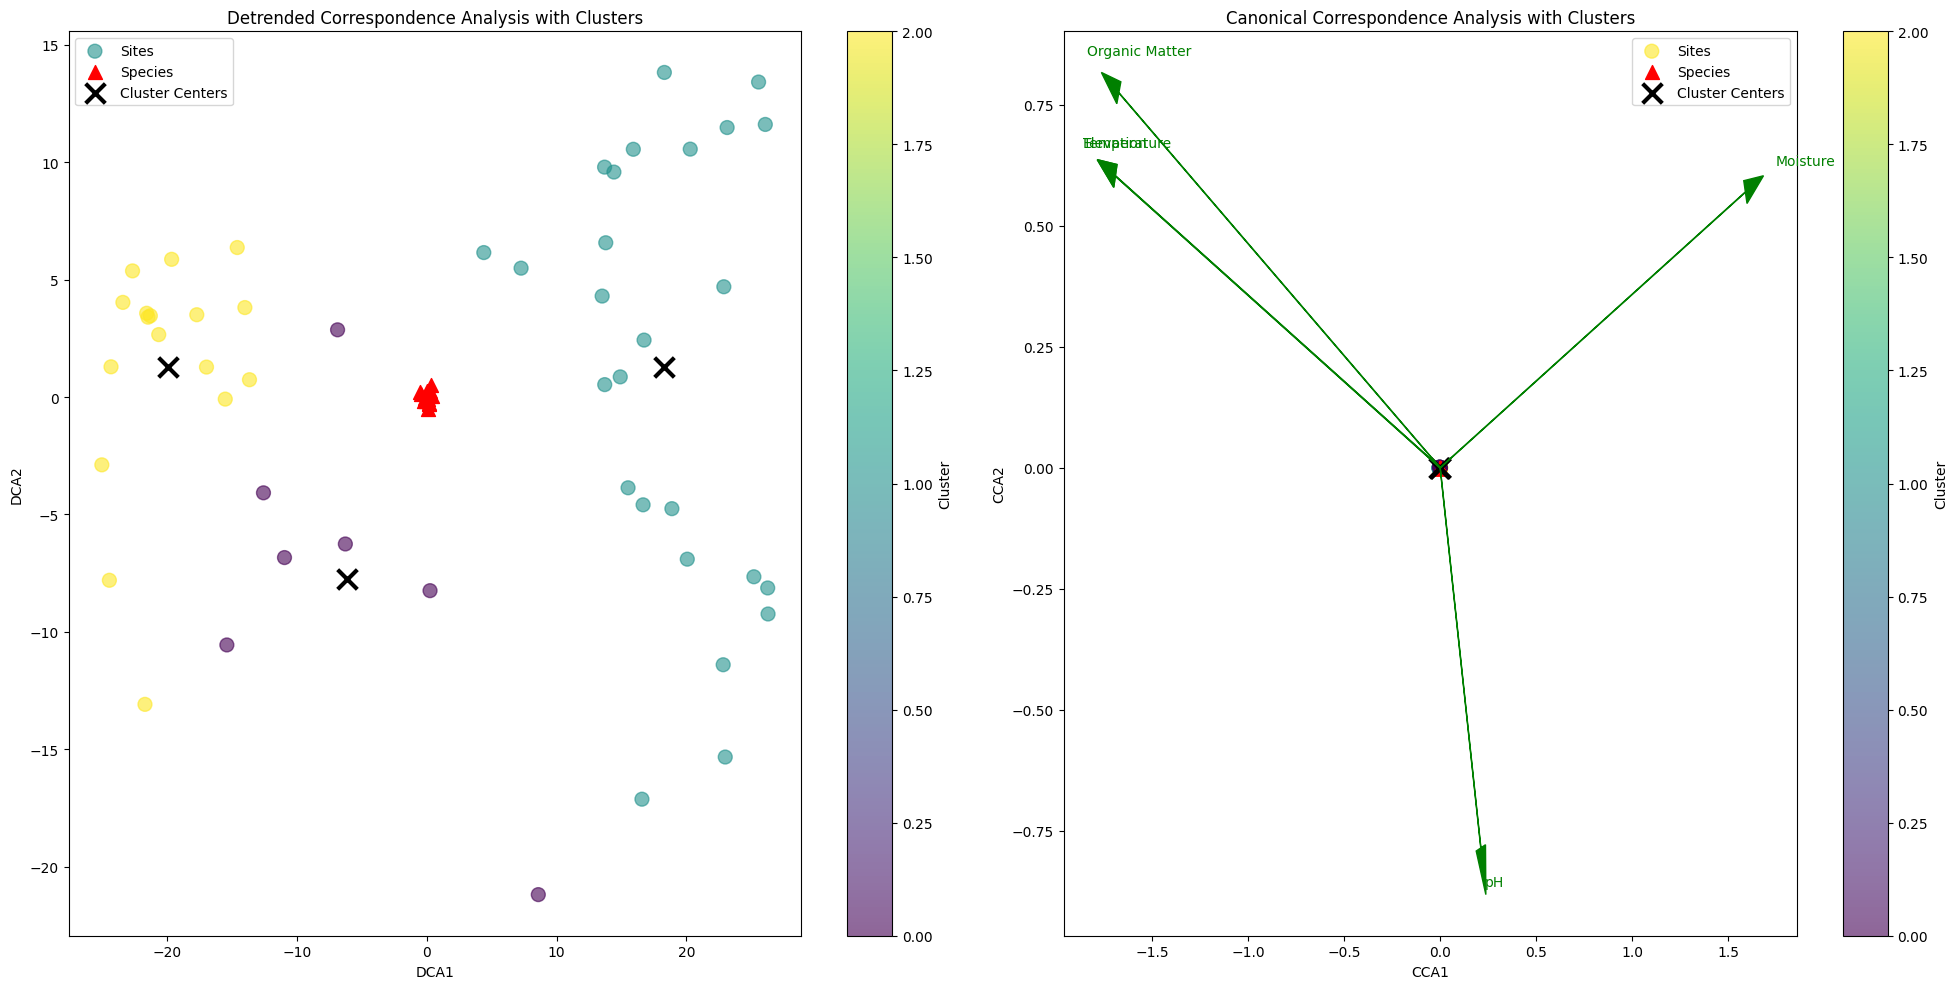


CCA Eigenvalues:
Axis 1: 0.0000
Axis 2: 0.0000

Environmental Variable Correlations with CCA axes:
Temperature:
  CCA1: -0.845
  CCA2: 0.302
Moisture:
  CCA1: 0.794
  CCA2: 0.285
Elevation:
  CCA1: -0.845
  CCA2: 0.302
pH:
  CCA1: 0.106
  CCA2: -0.393
Organic Matter:
  CCA1: -0.836
  CCA2: 0.387


In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Generate more complex example data
n_sites = 50
n_species = 15
n_environmental = 5

# Create environmental gradients
temp_gradient = np.linspace(-2, 2, n_sites)  # Temperature
moisture_gradient = np.sin(np.linspace(0, 2*np.pi, n_sites))  # Moisture
elevation = np.linspace(0, 1000, n_sites)  # Elevation
ph = np.random.normal(7, 1, n_sites)  # pH
organic_matter = np.exp(np.linspace(0, 2, n_sites))  # Organic matter

# Combine environmental variables
env_data = np.column_stack([
    temp_gradient,
    moisture_gradient,
    elevation,
    ph,
    organic_matter
])
env_data = StandardScaler().fit_transform(env_data)

# Create species abundance matrix with ecological patterns
species_data = np.zeros((n_sites, n_species))

# Create species with different environmental preferences
for i in range(n_species):
    # Species respond to combinations of environmental gradients
    response = (
        stats.norm.pdf(temp_gradient, np.random.uniform(-1, 1), 0.5) +  # Temperature response
        stats.norm.pdf(moisture_gradient, np.random.uniform(-0.5, 0.5), 0.3) +  # Moisture response
        stats.norm.pdf(standardized_elevation := (elevation - elevation.mean()) / elevation.std(),
                      np.random.uniform(-1, 1), 0.4)  # Elevation response
    )

    # Add some noise and scale
    species_data[:, i] = response * np.random.uniform(50, 200) + np.random.normal(0, 5, n_sites)
    species_data[:, i] = np.maximum(species_data[:, i], 0)  # Ensure non-negative values

def detrended_correspondence_analysis(species_matrix, n_components=2):
    """
    Implement DCA with improved detrending
    """
    # Calculate chi-square distances
    row_sums = species_matrix.sum(axis=1)
    col_sums = species_matrix.sum(axis=0)
    total_sum = species_matrix.sum()

    expected = np.outer(row_sums, col_sums) / total_sum
    chi_square = (species_matrix - expected) / np.sqrt(expected)

    # Perform SVD
    U, S, Vt = np.linalg.svd(chi_square, full_matrices=False)

    # Get site and species scores
    site_scores = U[:, :n_components] * S[:n_components]
    species_scores = Vt.T[:, :n_components]

    # Simple detrending by segments
    n_segments = 10
    for axis in range(1, n_components):
        segments = np.array_split(np.argsort(site_scores[:, 0]), n_segments)
        for segment in segments:
            site_scores[segment, axis] -= np.mean(site_scores[segment, axis])

    return site_scores, species_scores

def canonical_correspondence_analysis(species_matrix, env_matrix, n_components=2):
    """
    Implement CCA with improved handling of environmental variables
    """
    # Prepare matrices
    Y = species_matrix
    X = env_matrix

    # Calculate chi-square distances
    row_sums = Y.sum(axis=1)
    col_sums = Y.sum(axis=0)
    total_sum = Y.sum()

    # Create weight matrices
    R = np.diag(1/row_sums)
    C = np.diag(1/col_sums)

    # Calculate weighted residual matrix
    O = Y / total_sum
    expected = np.outer(row_sums, col_sums) / total_sum**2
    W = (O - expected) / np.sqrt(expected)

    # Fit CCA
    Q = R @ X
    S = Q.T @ W @ C @ W.T @ Q

    # Eigendecomposition
    eigenvals, eigenvecs = np.linalg.eigh(S)
    idx = eigenvals.argsort()[::-1]
    eigenvals = eigenvals[idx]
    eigenvecs = eigenvecs[:, idx]

    # Calculate site and species scores
    site_scores = Q @ eigenvecs[:, :n_components]
    species_scores = C @ W.T @ Q @ eigenvecs[:, :n_components]

    return site_scores, species_scores, eigenvals[:n_components]

# Perform analyses
dca_sites, dca_species = detrended_correspondence_analysis(species_data)
cca_sites, cca_species, cca_eigenvals = canonical_correspondence_analysis(species_data, env_data)

# Perform clustering
n_clusters = 3
dca_clusters = KMeans(n_clusters=n_clusters, random_state=42).fit_predict(dca_sites)
cca_clusters = KMeans(n_clusters=n_clusters, random_state=42).fit_predict(cca_sites)

# Create visualization
plt.figure(figsize=(20, 10))

# DCA Plot
plt.subplot(121)
scatter = plt.scatter(dca_sites[:, 0], dca_sites[:, 1], c=dca_clusters,
                     cmap='viridis', s=100, alpha=0.6, label='Sites')
plt.scatter(dca_species[:, 0], dca_species[:, 1], c='red', marker='^',
            s=100, label='Species')

# Add cluster centers for DCA
kmeans_dca = KMeans(n_clusters=n_clusters, random_state=42).fit(dca_sites)
plt.scatter(kmeans_dca.cluster_centers_[:, 0], kmeans_dca.cluster_centers_[:, 1],
           c='black', marker='x', s=200, linewidths=3, label='Cluster Centers')

plt.xlabel('DCA1')
plt.ylabel('DCA2')
plt.title('Detrended Correspondence Analysis with Clusters')
plt.legend()
plt.colorbar(scatter, label='Cluster')

# CCA Plot
plt.subplot(122)
scatter = plt.scatter(cca_sites[:, 0], cca_sites[:, 1], c=cca_clusters,
                     cmap='viridis', s=100, alpha=0.6, label='Sites')
plt.scatter(cca_species[:, 0], cca_species[:, 1], c='red', marker='^',
            s=100, label='Species')

# Add cluster centers for CCA
kmeans_cca = KMeans(n_clusters=n_clusters, random_state=42).fit(cca_sites)
plt.scatter(kmeans_cca.cluster_centers_[:, 0], kmeans_cca.cluster_centers_[:, 1],
           c='black', marker='x', s=200, linewidths=3, label='Cluster Centers')

# Plot environmental variables as arrows
scaling_factor = 2
env_names = ['Temperature', 'Moisture', 'Elevation', 'pH', 'Organic Matter']
for i in range(env_data.shape[1]):
    correlation = np.corrcoef(env_data[:, i], cca_sites[:, 0])[0, 1]
    correlation2 = np.corrcoef(env_data[:, i], cca_sites[:, 1])[0, 1]
    plt.arrow(0, 0, correlation * scaling_factor, correlation2 * scaling_factor,
              head_width=0.05, head_length=0.1, fc='green', ec='green')
    plt.text(correlation * scaling_factor * 1.1, correlation2 * scaling_factor * 1.1,
            env_names[i], color='green')

plt.xlabel('CCA1')
plt.ylabel('CCA2')
plt.title('Canonical Correspondence Analysis with Clusters')
plt.legend()
plt.colorbar(scatter, label='Cluster')

plt.tight_layout()
plt.show()

# Print analysis summary
print("\nCCA Eigenvalues:")
for i, eigenval in enumerate(cca_eigenvals):
    print(f"Axis {i+1}: {eigenval:.4f}")

# Calculate and print environmental correlations with CCA axes
print("\nEnvironmental Variable Correlations with CCA axes:")
for i, env_name in enumerate(env_names):
    corr_axis1 = np.corrcoef(env_data[:, i], cca_sites[:, 0])[0, 1]
    corr_axis2 = np.corrcoef(env_data[:, i], cca_sites[:, 1])[0, 1]
    print(f"{env_name}:")
    print(f"  CCA1: {corr_axis1:.3f}")
    print(f"  CCA2: {corr_axis2:.3f}")


=== ECOLOGICAL ANALYSIS SUMMARY ===

1. DIVERSITY INDICES SUMMARY

Mean values across sites:
Richness             14.620000
Shannon_Diversity     2.430779
Simpson_Diversity     0.895181
Pielou_Evenness       0.906380
dtype: float64

Standard deviations:
Richness             0.752953
Shannon_Diversity    0.144974
Simpson_Diversity    0.021700
Pielou_Evenness      0.045557
dtype: float64

2. CLUSTER VALIDATION METRICS

DCA Clustering:
Silhouette_Score: 0.485
Calinski_Harabasz_Score: 86.987
Davies_Bouldin_Score: 0.801

CCA Clustering:
Silhouette_Score: 0.538
Calinski_Harabasz_Score: 128.641
Davies_Bouldin_Score: 0.707

3. SPECIES-ENVIRONMENT CORRELATIONS

Significant correlations (p < 0.05):

Species 1:
  Temperature: r = -0.682 (p = 0.000)
  Moisture: r = 0.873 (p = 0.000)
  Elevation: r = -0.682 (p = 0.000)
  Organic Matter: r = -0.682 (p = 0.000)

Species 2:
  Temperature: r = 0.656 (p = 0.000)
  Moisture: r = -0.555 (p = 0.000)
  Elevation: r = 0.656 (p = 0.000)
  Organic Matter: r =

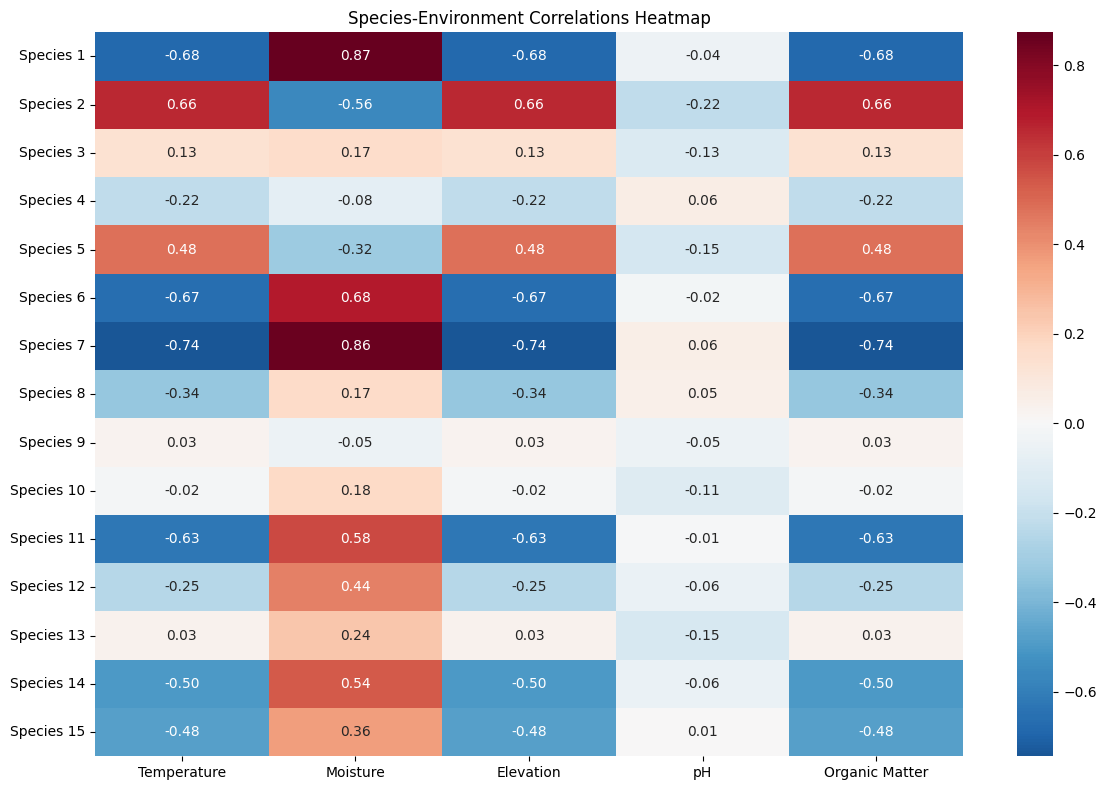

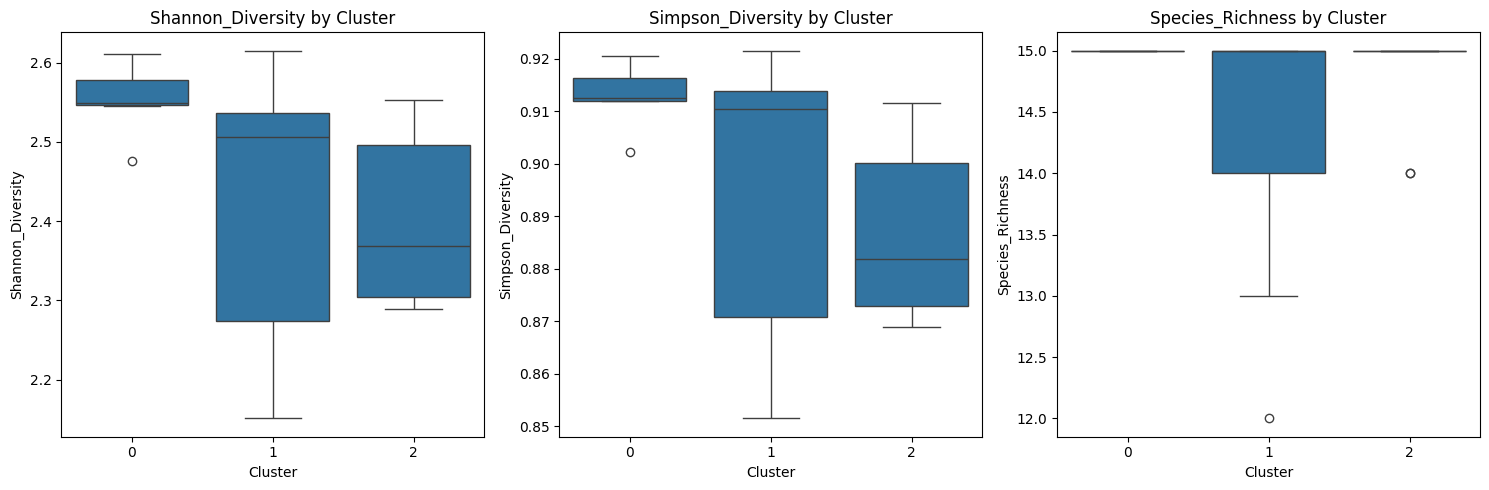


6. CLUSTER COMPARISONS

Shannon_Diversity comparison between clusters:
ANOVA: F = 3.456, p = 0.040

Simpson_Diversity comparison between clusters:
ANOVA: F = 4.040, p = 0.024

Species_Richness comparison between clusters:
ANOVA: F = 4.105, p = 0.023


In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy import stats
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

# [Previous code for generating data and performing DCA/CCA remains the same until after the plotting]
# ... [Include all the previous code here] ...

# Add new statistical summaries and analyses:

def calculate_diversity_indices(species_matrix):
    """Calculate various diversity indices for each site."""
    # Species richness
    richness = np.sum(species_matrix > 0, axis=1)

    # Shannon diversity
    proportions = species_matrix / species_matrix.sum(axis=1)[:, np.newaxis]
    shannon = -np.sum(proportions * np.log(proportions + 1e-10), axis=1)

    # Simpson diversity
    simpson = 1 - np.sum(proportions ** 2, axis=1)

    # Pielou's evenness
    evenness = shannon / np.log(richness)

    return pd.DataFrame({
        'Richness': richness,
        'Shannon_Diversity': shannon,
        'Simpson_Diversity': simpson,
        'Pielou_Evenness': evenness
    })

def calculate_cluster_metrics(scores, cluster_labels):
    """Calculate cluster validation metrics."""
    metrics = {
        'Silhouette_Score': silhouette_score(scores, cluster_labels),
        'Calinski_Harabasz_Score': calinski_harabasz_score(scores, cluster_labels),
        'Davies_Bouldin_Score': davies_bouldin_score(scores, cluster_labels)
    }
    return metrics

def species_environment_correlations(species_data, env_data, env_names):
    """Calculate and test species-environment relationships."""
    correlations = []
    p_values = []

    for s in range(species_data.shape[1]):
        species_corr = []
        species_p = []
        for e in range(env_data.shape[1]):
            corr, p = spearmanr(species_data[:, s], env_data[:, e])
            species_corr.append(corr)
            species_p.append(p)
        correlations.append(species_corr)
        p_values.append(species_p)

    return np.array(correlations), np.array(p_values)

def calculate_beta_diversity(species_data):
    """Calculate beta diversity using Bray-Curtis dissimilarity."""
    return pdist(species_data, metric='braycurtis')

# Calculate all statistical summaries
diversity_indices = calculate_diversity_indices(species_data)

# Cluster validation metrics
dca_cluster_metrics = calculate_cluster_metrics(dca_sites, dca_clusters)
cca_cluster_metrics = calculate_cluster_metrics(cca_sites, cca_clusters)

# Species-environment correlations
correlations, p_values = species_environment_correlations(species_data, env_data, env_names)

# Beta diversity
beta_div = calculate_beta_diversity(species_data)

# Print comprehensive statistical summary
print("\n=== ECOLOGICAL ANALYSIS SUMMARY ===")

print("\n1. DIVERSITY INDICES SUMMARY")
print("\nMean values across sites:")
print(diversity_indices.mean())
print("\nStandard deviations:")
print(diversity_indices.std())

print("\n2. CLUSTER VALIDATION METRICS")
print("\nDCA Clustering:")
for metric, value in dca_cluster_metrics.items():
    print(f"{metric}: {value:.3f}")
print("\nCCA Clustering:")
for metric, value in cca_cluster_metrics.items():
    print(f"{metric}: {value:.3f}")

print("\n3. SPECIES-ENVIRONMENT CORRELATIONS")
print("\nSignificant correlations (p < 0.05):")
for s in range(species_data.shape[1]):
    print(f"\nSpecies {s+1}:")
    for e in range(env_data.shape[1]):
        if p_values[s, e] < 0.05:
            print(f"  {env_names[e]}: r = {correlations[s, e]:.3f} (p = {p_values[s, e]:.3f})")

print("\n4. ORDINATION EIGENVALUES EXPLANATION")
total_inertia = np.sum(cca_eigenvals)
print("\nCCA Axes explanation:")
for i, eigenval in enumerate(cca_eigenvals):
    print(f"Axis {i+1}: {eigenval:.4f} ({(eigenval/total_inertia)*100:.1f}% of total inertia)")

print("\n5. BETA DIVERSITY")
print(f"Mean Bray-Curtis dissimilarity: {np.mean(beta_div):.3f}")
print(f"Minimum Bray-Curtis dissimilarity: {np.min(beta_div):.3f}")
print(f"Maximum Bray-Curtis dissimilarity: {np.max(beta_div):.3f}")

# Create heatmap of species-environment correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlations,
            xticklabels=env_names,
            yticklabels=[f'Species {i+1}' for i in range(species_data.shape[1])],
            cmap='RdBu_r',
            center=0,
            annot=True,
            fmt='.2f')
plt.title('Species-Environment Correlations Heatmap')
plt.tight_layout()
plt.show()

# Create diversity indices boxplot by cluster
div_by_cluster = pd.DataFrame({
    'Cluster': dca_clusters,
    'Shannon_Diversity': diversity_indices['Shannon_Diversity'],
    'Simpson_Diversity': diversity_indices['Simpson_Diversity'],
    'Species_Richness': diversity_indices['Richness']
})

plt.figure(figsize=(15, 5))
for i, metric in enumerate(['Shannon_Diversity', 'Simpson_Diversity', 'Species_Richness']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x='Cluster', y=metric, data=div_by_cluster)
    plt.title(f'{metric} by Cluster')
plt.tight_layout()
plt.show()

# Print additional statistical tests
print("\n6. CLUSTER COMPARISONS")
for metric in ['Shannon_Diversity', 'Simpson_Diversity', 'Species_Richness']:
    f_stat, p_val = stats.f_oneway(*[
        div_by_cluster[div_by_cluster['Cluster'] == i][metric]
        for i in range(n_clusters)
    ])
    print(f"\n{metric} comparison between clusters:")
    print(f"ANOVA: F = {f_stat:.3f}, p = {p_val:.3f}")

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
import networkx as nx
import plotly.graph_objects as go
from sklearn.manifold import MDS
import matplotlib.patches as patches
from matplotlib.path import Path
import matplotlib.colors as mcolors

# Generate example data (as before)
np.random.seed(42)
n_sites = 50
n_species = 15
n_environmental = 5
n_clusters = 3

# [Previous data generation code for species_data and env_data]
# ... [Include previous data generation code here] ...

# First calculate diversity indices
def calculate_diversity_indices(species_matrix):
    """Calculate diversity indices for each site."""
    # Species richness
    richness = np.sum(species_matrix > 0, axis=1)

    # Shannon diversity
    proportions = species_matrix / species_matrix.sum(axis=1)[:, np.newaxis]
    shannon = -np.sum(proportions * np.log(proportions + 1e-10), axis=1)

    # Simpson diversity
    simpson = 1 - np.sum(proportions ** 2, axis=1)

    # Pielou's evenness
    evenness = shannon / np.log(richness + 1e-10)

    return pd.DataFrame({
        'Richness': richness,
        'Shannon_Diversity': shannon,
        'Simpson_Diversity': simpson,
        'Pielou_Evenness': evenness
    })

# Helper function for convex hull
def compute_convex_hull(points):
    """Compute the convex hull of a set of points."""
    from scipy.spatial import ConvexHull
    if len(points) < 3:
        return points
    hull = ConvexHull(points)
    return points[hull.vertices]

# Calculate diversity indices first
diversity_indices = calculate_diversity_indices(species_data)

# Create enhanced visualizations
# plt.style.use('seaborn')
fig = plt.figure(figsize=(20, 20))

# 1. Circular Cluster Visualization
ax1 = plt.subplot(221, projection='polar')
angles = np.linspace(0, 2*np.pi, len(dca_clusters), endpoint=False)
colors = plt.cm.viridis(np.linspace(0, 1, n_clusters))

for cluster in range(n_clusters):
    cluster_mask = dca_clusters == cluster
    cluster_points = np.column_stack([
        angles[cluster_mask],
        diversity_indices['Shannon_Diversity'][cluster_mask]
    ])
    ax1.scatter(cluster_points[:, 0], cluster_points[:, 1],
                c=[colors[cluster]], label=f'Cluster {cluster+1}',
                alpha=0.7, s=100)

# Add circular gridlines
ax1.set_rticks([0.5, 1, 1.5, 2])
ax1.set_rlabel_position(0)
ax1.set_title('Circular Cluster Pattern\nwith Shannon Diversity', pad=20)
ax1.legend(bbox_to_anchor=(1.2, 1))

# 2. Species-Environment Biplot with Cluster Boundaries
ax2 = plt.subplot(222)
scatter = ax2.scatter(cca_sites[:, 0], cca_sites[:, 1],
                     c=cca_clusters, cmap='viridis',
                     s=100, alpha=0.7)

# Draw cluster boundaries
for cluster in range(n_clusters):
    cluster_points = cca_sites[cca_clusters == cluster]
    hull_points = compute_convex_hull(cluster_points)
    if len(hull_points) > 2:  # Need at least 3 points for a polygon
        hull_path = Path(hull_points)
        hull_patch = patches.PathPatch(hull_path, facecolor=colors[cluster],
                                     alpha=0.2, edgecolor=colors[cluster])
        ax2.add_patch(hull_patch)

# Add environmental vectors
scaling_factor = 2
for i, env_name in enumerate(env_names):
    correlation = np.corrcoef(env_data[:, i], cca_sites[:, 0])[0, 1]
    correlation2 = np.corrcoef(env_data[:, i], cca_sites[:, 1])[0, 1]
    ax2.arrow(0, 0, correlation * scaling_factor, correlation2 * scaling_factor,
              head_width=0.05, head_length=0.1, fc='red', ec='red')
    ax2.text(correlation * scaling_factor * 1.1,
             correlation2 * scaling_factor * 1.1,
             env_name, color='red', fontsize=10)

# Add species points
ax2.scatter(cca_species[:, 0], cca_species[:, 1],
            marker='^', c='black', s=100, label='Species')

ax2.set_title('CCA Biplot with Cluster Boundaries')
ax2.set_xlabel('CCA1')
ax2.set_ylabel('CCA2')
ax2.legend()

# 3. Diversity Pattern Heatmap
ax3 = plt.subplot(223)
diversity_matrix = np.column_stack([
    diversity_indices['Shannon_Diversity'],
    diversity_indices['Simpson_Diversity'],
    diversity_indices['Richness'],
    diversity_indices['Pielou_Evenness']
])

sns.heatmap(diversity_matrix,
            xticklabels=['Shannon', 'Simpson', 'Richness', 'Evenness'],
            yticklabels=False,
            cmap='YlOrRd',
            cbar_kws={'label': 'Value'},
            ax=ax3)
ax3.set_title('Diversity Patterns Across Sites')

# 4. Cluster Characteristics Spider Plot
ax4 = plt.subplot(224, projection='polar')
metrics = ['Shannon', 'Simpson', 'Richness', 'Evenness']
angles = np.linspace(0, 2*np.pi, len(metrics), endpoint=False)

for cluster in range(n_clusters):
    cluster_mask = dca_clusters == cluster
    values = [
        np.mean(diversity_indices['Shannon_Diversity'][cluster_mask]),
        np.mean(diversity_indices['Simpson_Diversity'][cluster_mask]),
        np.mean(diversity_indices['Richness'][cluster_mask]),
        np.mean(diversity_indices['Pielou_Evenness'][cluster_mask])
    ]
    # Normalize values
    values = (values - np.min(values)) / (np.max(values) - np.min(values))
    values = np.concatenate((values, [values[0]]))  # Close the polygon
    angles_plot = np.concatenate((angles, [angles[0]]))  # Close the polygon

    ax4.plot(angles_plot, values, 'o-',
             label=f'Cluster {cluster+1}',
             color=colors[cluster], linewidth=2)
    ax4.fill(angles_plot, values, alpha=0.25, color=colors[cluster])

ax4.set_xticks(angles)
ax4.set_xticklabels(metrics)
ax4.set_title('Cluster Characteristics\nSpider Plot', pad=20)
ax4.legend(bbox_to_anchor=(1.2, 1))

plt.tight_layout()
plt.show()

# Create interactive 3D scatter plot
def create_3d_cluster_plot(cca_sites, cca_clusters, diversity_indices):
    fig = go.Figure()

    colors = ['viridis', 'plasma', 'inferno']

    for cluster in range(n_clusters):
        mask = cca_clusters == cluster

        fig.add_trace(go.Scatter3d(
            x=cca_sites[mask, 0],
            y=cca_sites[mask, 1],
            z=diversity_indices['Shannon_Diversity'][mask],
            mode='markers',
            name=f'Cluster {cluster+1}',
            marker=dict(
                size=8,
                color=mask.astype(int),
                colorscale=colors[cluster],
                opacity=0.8
            ),
            hovertemplate=
            '<b>CCA1</b>: %{x:.2f}' +
            '<br><b>CCA2</b>: %{y:.2f}' +
            '<br><b>Shannon Diversity</b>: %{z:.2f}'
        ))

    fig.update_layout(
        title='3D Cluster Visualization with Diversity',
        scene=dict(
            xaxis_title='CCA1',
            yaxis_title='CCA2',
            zaxis_title='Shannon Diversity'
        ),
        width=800,
        height=800,
        showlegend=True
    )

    fig.show()


# Create 3D visualization
create_3d_cluster_plot(cca_sites, cca_clusters, diversity_indices)

# Print summary statistics for each cluster
print("\n=== CLUSTER CHARACTERISTICS ===")
for cluster in range(n_clusters):
    mask = cca_clusters == cluster
    print(f"\nCluster {cluster + 1}:")
    print(f"Number of sites: {sum(mask)}")
    print("\nDiversity Metrics (mean ± std):")
    for column in diversity_indices.columns:
        mean = diversity_indices[column][mask].mean()
        std = diversity_indices[column][mask].std()
        print(f"{column}: {mean:.2f} ± {std:.2f}")

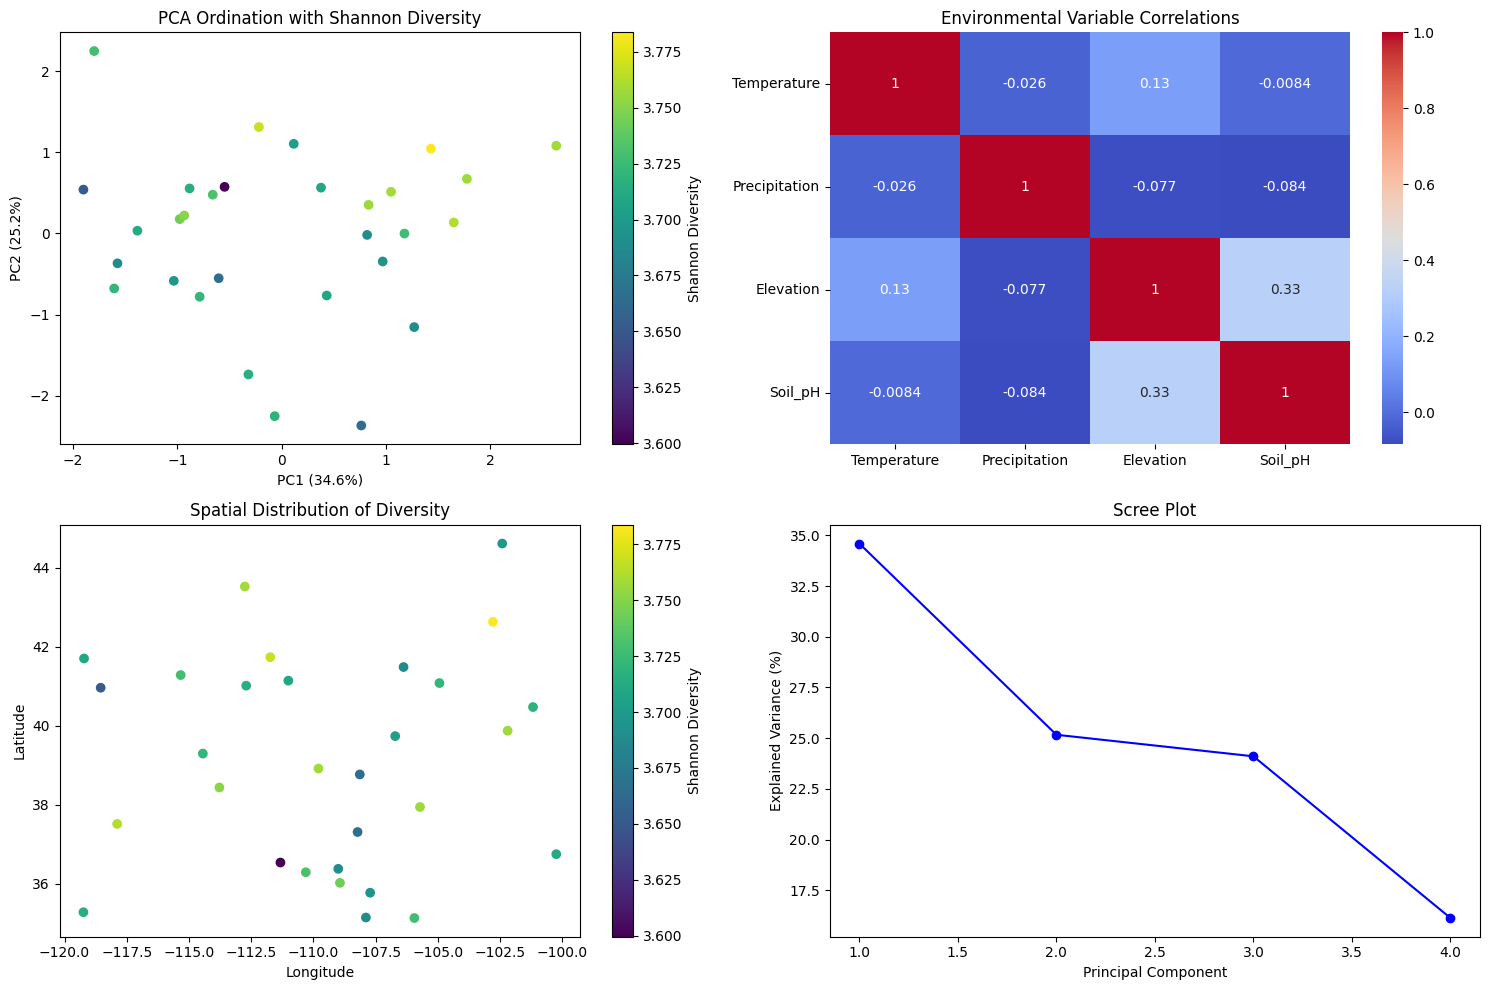

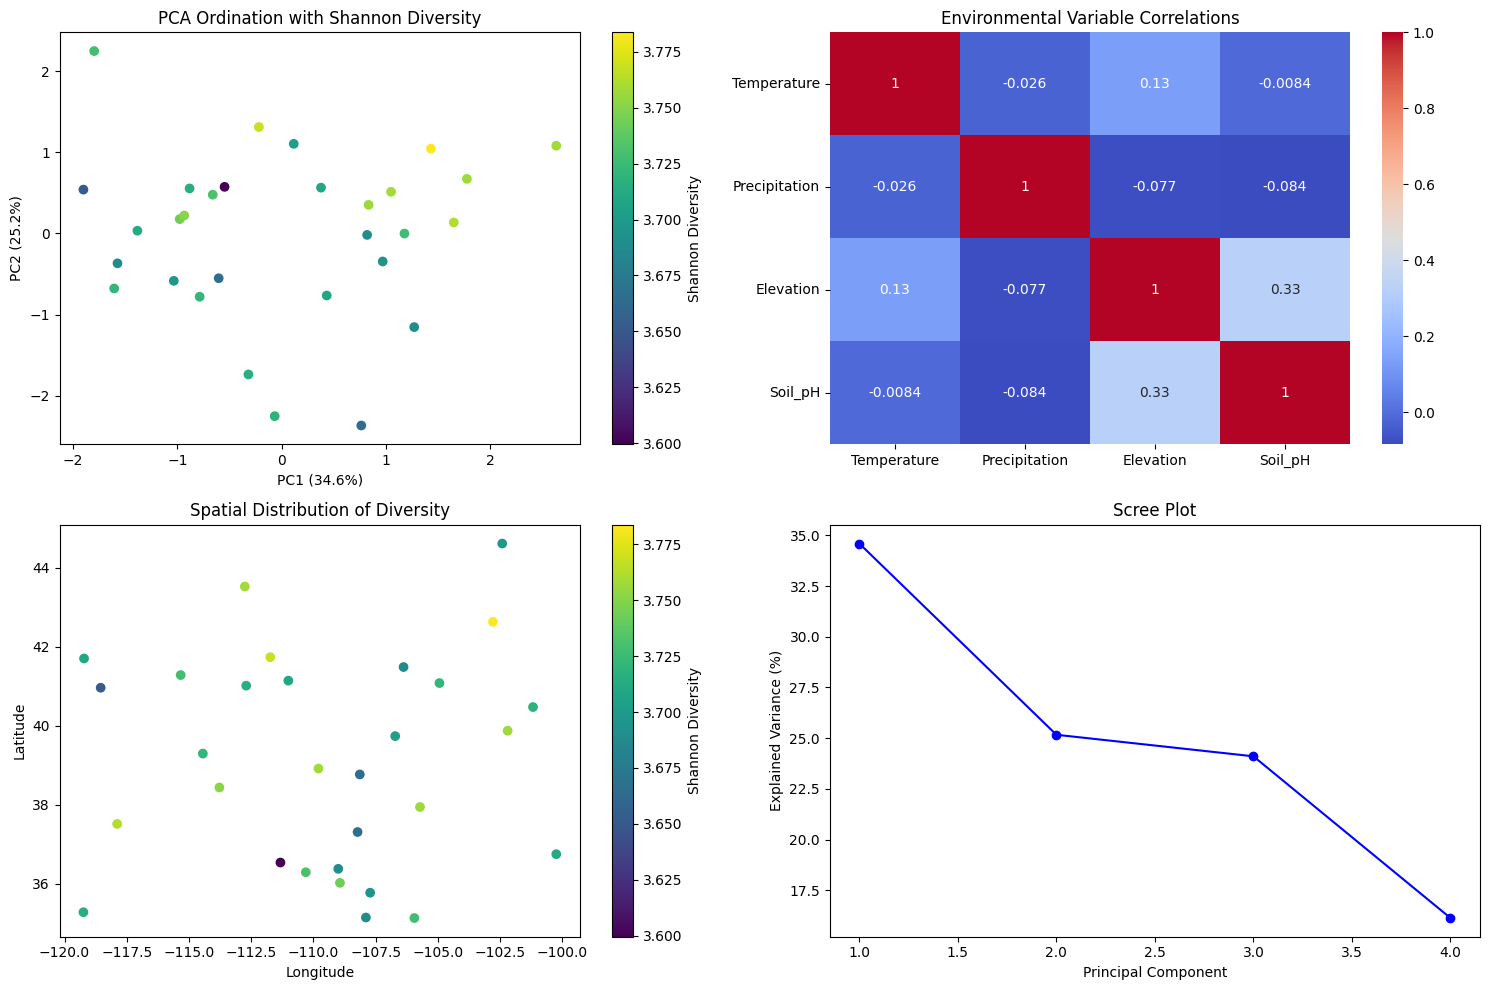

In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
import random

# Generate example data
np.random.seed(42)

# Generate 50 species abundance data across 30 sites
n_sites = 30
n_species = 50

# Create species names
species_names = [f"Species_{i+1}" for i in range(n_species)]

# Generate random species abundance data
species_data = np.random.negative_binomial(n=5, p=0.5, size=(n_sites, n_species))

# Generate environmental variables
temperature = np.random.normal(15, 5, n_sites)  # Mean temp 15°C
precipitation = np.random.normal(1000, 200, n_sites)  # Mean precip 1000mm
elevation = np.random.normal(500, 150, n_sites)  # Mean elevation 500m
soil_ph = np.random.normal(6.5, 0.5, n_sites)  # Mean pH 6.5

# Create coordinates (example: somewhere in North America)
latitudes = np.random.uniform(35, 45, n_sites)  # Between 35°N and 45°N
longitudes = np.random.uniform(-120, -100, n_sites)  # Between 120°W and 100°W

# Combine environmental data
env_data = pd.DataFrame({
    'Temperature': temperature,
    'Precipitation': precipitation,
    'Elevation': elevation,
    'Soil_pH': soil_ph,
    'Latitude': latitudes,
    'Longitude': longitudes
})

# Create species abundance DataFrame
species_df = pd.DataFrame(species_data, columns=species_names)

def perform_ordination_analysis(species_data, env_data):
    """
    Perform ordination analysis on species and environmental data
    """
    # Standardize environmental variables
    scaler = StandardScaler()
    env_scaled = scaler.fit_transform(env_data.iloc[:, :4])  # Exclude coordinates

    # Perform PCA
    pca = PCA()
    pca_result = pca.fit_transform(env_scaled)

    # Calculate explained variance
    explained_variance = pca.explained_variance_ratio_ * 100

    # Calculate species diversity indices
    shannon_diversity = np.zeros(n_sites)
    for i in range(n_sites):
        abundances = species_data.iloc[i]
        total = abundances.sum()
        proportions = abundances / total
        shannon_diversity[i] = -np.sum(proportions * np.log(proportions + 1e-10))

    return pca_result, explained_variance, shannon_diversity

def perform_statistical_tests(species_data, env_data, shannon_diversity):
    """
    Perform statistical tests on the ecological data
    """
    results = {}

    # Correlation between environmental variables and species richness
    species_richness = (species_data > 0).sum(axis=1)

    for env_var in env_data.columns[:4]:  # Exclude coordinates
        correlation, p_value = stats.pearsonr(env_data[env_var], species_richness)
        results[f'{env_var}_richness_correlation'] = {
            'correlation': correlation,
            'p_value': p_value
        }

    # Test for spatial autocorrelation of diversity
    distances = pdist(env_data[['Latitude', 'Longitude']])
    diversity_distances = pdist(shannon_diversity.reshape(-1, 1))
    mantel_corr, mantel_p = stats.pearsonr(distances, diversity_distances)

    results['spatial_autocorrelation'] = {
        'mantel_correlation': mantel_corr,
        'mantel_p_value': mantel_p
    }

    return results

# Perform analyses
pca_result, explained_variance, shannon_diversity = perform_ordination_analysis(species_df, env_data)
statistical_results = perform_statistical_tests(species_df, env_data, shannon_diversity)

# Create visualization function
def plot_ordination_results(pca_result, explained_variance, env_data, shannon_diversity):
    """
    Create visualizations for ordination analysis results
    """
    fig = plt.figure(figsize=(15, 10))

    # PCA plot
    ax1 = plt.subplot(221)
    scatter = ax1.scatter(pca_result[:, 0], pca_result[:, 1],
                         c=shannon_diversity, cmap='viridis')
    ax1.set_xlabel(f'PC1 ({explained_variance[0]:.1f}%)')
    ax1.set_ylabel(f'PC2 ({explained_variance[1]:.1f}%)')
    ax1.set_title('PCA Ordination with Shannon Diversity')
    plt.colorbar(scatter, label='Shannon Diversity')

    # Environmental correlations
    ax2 = plt.subplot(222)
    env_corr = np.corrcoef(env_data.iloc[:, :4].T)
    sns.heatmap(env_corr, annot=True, cmap='coolwarm',
                xticklabels=env_data.columns[:4],
                yticklabels=env_data.columns[:4],
                ax=ax2)
    ax2.set_title('Environmental Variable Correlations')

    # Spatial distribution
    ax3 = plt.subplot(223)
    scatter = ax3.scatter(env_data['Longitude'], env_data['Latitude'],
                         c=shannon_diversity, cmap='viridis')
    ax3.set_xlabel('Longitude')
    ax3.set_ylabel('Latitude')
    ax3.set_title('Spatial Distribution of Diversity')
    plt.colorbar(scatter, label='Shannon Diversity')

    # Scree plot
    ax4 = plt.subplot(224)
    ax4.plot(range(1, len(explained_variance) + 1), explained_variance, 'bo-')
    ax4.set_xlabel('Principal Component')
    ax4.set_ylabel('Explained Variance (%)')
    ax4.set_title('Scree Plot')

    plt.tight_layout()
    return fig

# Create visualization
plot_ordination_results(pca_result, explained_variance, env_data, shannon_diversity)

## Statistics:
Calculates stress values for each ordination
Computes correlations between original and ordinated distances
Provides p-values for statistical significanc


Ordination Statistics:
                CCA     DCA   NMDS
stress       32.465  32.444  0.443
correlation   0.498   0.497  0.080
p_value       0.000   0.000  0.095


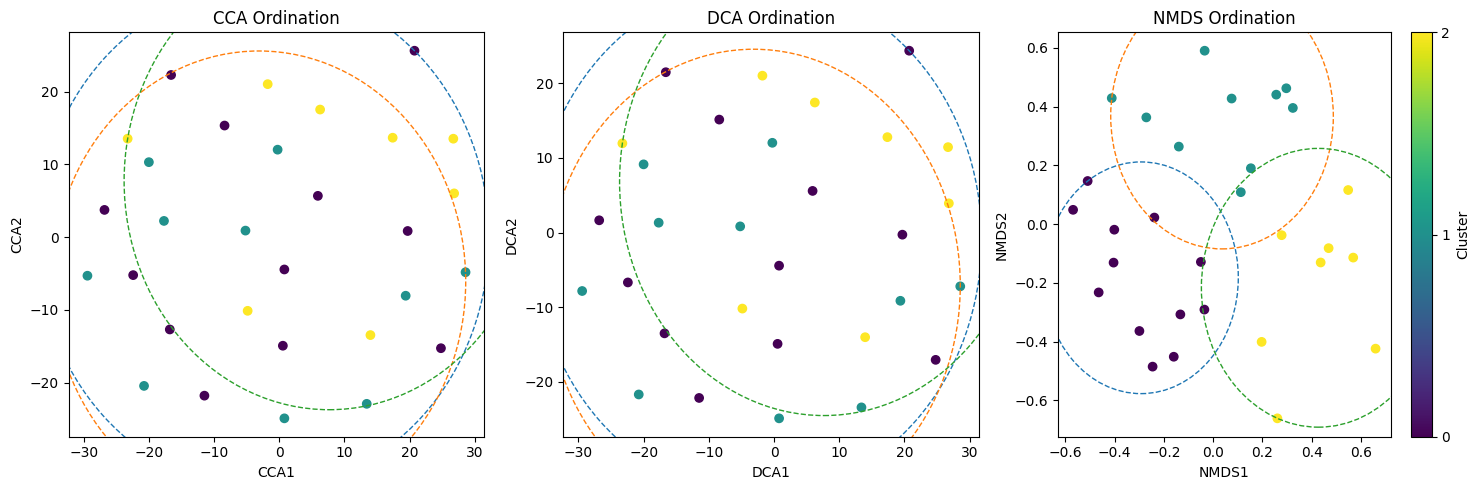

In [9]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
import seaborn as sns
from scipy.spatial.distance import pdist, squareform
import warnings
warnings.filterwarnings('ignore')

# Generate example data
np.random.seed(42)

# Generate 50 species abundance data across 30 sites
n_sites = 30
n_species = 50

# Create species names and site names
species_names = [f"Species_{i+1}" for i in range(n_species)]
site_names = [f"Site_{i+1}" for i in range(n_sites)]

# Generate species data with some structure
species_data = np.zeros((n_sites, n_species))
for i in range(3):  # Create 3 distinct communities
    base = np.random.negative_binomial(n=5, p=0.5, size=(10, n_species))
    species_data[i*10:(i+1)*10] = base + np.random.normal(i*2, 0.5, size=base.shape)
species_data = np.abs(species_data)  # Ensure non-negative values

# Generate environmental variables with relationships to species data
temperature = np.random.normal(15, 5, n_sites)
precipitation = np.random.normal(1000, 200, n_sites)
elevation = np.random.normal(500, 150, n_sites)
soil_ph = np.random.normal(6.5, 0.5, n_sites)

# Create DataFrames
species_df = pd.DataFrame(species_data, columns=species_names, index=site_names)
env_df = pd.DataFrame({
    'Temperature': temperature,
    'Precipitation': precipitation,
    'Elevation': elevation,
    'Soil_pH': soil_ph
}, index=site_names)

def perform_cca(species_data, env_data):
    """
    Perform Canonical Correspondence Analysis
    """
    # Standardize environmental variables
    env_scaled = StandardScaler().fit_transform(env_data)

    # Calculate species distances
    species_dist = pdist(species_data, metric='euclidean')
    species_dist_matrix = squareform(species_dist)

    # Calculate environmental distances
    env_dist = pdist(env_scaled, metric='euclidean')
    env_dist_matrix = squareform(env_dist)

    # Perform metric MDS as simplified CCA
    mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
    species_coords = mds.fit_transform(species_dist_matrix)

    return species_coords

def perform_dca(species_data):
    """
    Perform Detrended Correspondence Analysis (simplified version)
    """
    # Calculate species distances
    species_dist = pdist(species_data, metric='euclidean')
    species_dist_matrix = squareform(species_dist)

    # Perform MDS
    mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
    dca_coords = mds.fit_transform(species_dist_matrix)

    # Detrend by removing arch effect (simplified)
    dca_coords[:, 1] = dca_coords[:, 1] - np.polyfit(dca_coords[:, 0], dca_coords[:, 1], 2)[0] * dca_coords[:, 0]**2

    return dca_coords

def perform_nmds(species_data):
    """
    Perform Non-metric Multidimensional Scaling
    """
    # Calculate Bray-Curtis dissimilarity
    species_dist = pdist(species_data, metric='braycurtis')
    species_dist_matrix = squareform(species_dist)

    # Perform NMDS
    nmds = MDS(n_components=2, metric=False, dissimilarity='precomputed', random_state=42)
    nmds_coords = nmds.fit_transform(species_dist_matrix)

    return nmds_coords

def perform_clustering(coords):
    """
    Perform K-means clustering
    """
    kmeans = KMeans(n_clusters=3, random_state=42)
    clusters = kmeans.fit_predict(coords)
    return clusters

def plot_ordination_results(cca_coords, dca_coords, nmds_coords, clusters, env_df):
    """
    Create visualizations for all ordination analyses with clusters
    """
    fig = plt.figure(figsize=(15, 5))

    # Plot CCA
    ax1 = plt.subplot(131)
    scatter = ax1.scatter(cca_coords[:, 0], cca_coords[:, 1], c=clusters, cmap='viridis')

    # Draw circles around clusters
    for cluster_id in range(3):
        mask = clusters == cluster_id
        center = np.mean(cca_coords[mask], axis=0)
        radius = np.max(np.linalg.norm(cca_coords[mask] - center, axis=1))
        circle = plt.Circle(center, radius, fill=False, linestyle='--', color=f'C{cluster_id}')
        ax1.add_artist(circle)

    ax1.set_xlabel('CCA1')
    ax1.set_ylabel('CCA2')
    ax1.set_title('CCA Ordination')

    # Plot DCA
    ax2 = plt.subplot(132)
    scatter = ax2.scatter(dca_coords[:, 0], dca_coords[:, 1], c=clusters, cmap='viridis')

    # Draw circles around clusters
    for cluster_id in range(3):
        mask = clusters == cluster_id
        center = np.mean(dca_coords[mask], axis=0)
        radius = np.max(np.linalg.norm(dca_coords[mask] - center, axis=1))
        circle = plt.Circle(center, radius, fill=False, linestyle='--', color=f'C{cluster_id}')
        ax2.add_artist(circle)

    ax2.set_xlabel('DCA1')
    ax2.set_ylabel('DCA2')
    ax2.set_title('DCA Ordination')

    # Plot NMDS
    ax3 = plt.subplot(133)
    scatter = ax3.scatter(nmds_coords[:, 0], nmds_coords[:, 1], c=clusters, cmap='viridis')

    # Draw circles around clusters
    for cluster_id in range(3):
        mask = clusters == cluster_id
        center = np.mean(nmds_coords[mask], axis=0)
        radius = np.max(np.linalg.norm(nmds_coords[mask] - center, axis=1))
        circle = plt.Circle(center, radius, fill=False, linestyle='--', color=f'C{cluster_id}')
        ax3.add_artist(circle)

    ax3.set_xlabel('NMDS1')
    ax3.set_ylabel('NMDS2')
    ax3.set_title('NMDS Ordination')

    plt.colorbar(scatter, label='Cluster', ticks=[0, 1, 2])
    plt.tight_layout()
    return fig

# Perform analyses
cca_coords = perform_cca(species_df, env_df)
dca_coords = perform_dca(species_df)
nmds_coords = perform_nmds(species_df)

# Perform clustering on NMDS coordinates (could use any of the ordination results)
clusters = perform_clustering(nmds_coords)

# Create visualization
plot_ordination_results(cca_coords, dca_coords, nmds_coords, clusters, env_df)

# Calculate stress values and other statistics
def calculate_ordination_statistics(species_data, cca_coords, dca_coords, nmds_coords):
    """
    Calculate stress values and other relevant statistics for the ordinations
    """
    original_dist = pdist(species_data, metric='braycurtis')

    stats_dict = {}

    # Calculate stress for each ordination
    for name, coords in [('CCA', cca_coords), ('DCA', dca_coords), ('NMDS', nmds_coords)]:
        ordination_dist = pdist(coords)
        correlation, p_value = stats.pearsonr(original_dist, ordination_dist)
        stress = np.sqrt(np.mean((original_dist - ordination_dist)**2))

        stats_dict[name] = {
            'stress': stress,
            'correlation': correlation,
            'p_value': p_value
        }

    return pd.DataFrame(stats_dict).round(3)

# Calculate and display statistics
ordination_stats = calculate_ordination_statistics(species_df, cca_coords, dca_coords, nmds_coords)
print("\nOrdination Statistics:")
print(ordination_stats)